# Recommendation : 

We will consider API Data and CSV Datasheet to evaluate the Overall Recommendation considering both the datasets. Based on the regions (Continent, country, city ), user preferences (family oriented, package deals, user source continent) from the CSV sheet and Sentimental score (room cleanliness, Room Comfort,Hotel condition) from Expedia API data - we will take user input and provide the best ten hotels in that regions

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import re
import requests
import logging
import os
import json
import html5lib
from bs4 import BeautifulSoup
import glob,string #Importing glob for iterations and storing
import seaborn as sns
%matplotlib inline
from matplotlib import *
import sys
from pylab import *
import urllib.request

In [2]:
currentWD = os.getcwd()
currentWD

'C:\\Users\\Jay Padhya\\Documents\\Python_FinalProject'

In [3]:
data_review = pd.read_csv('reviews_clean_flitered.txt',names=["hotelID","Expedia_User_Comments","Expedia_Cleanliness","Expedia_RoomComfort","Expedia_HotelCondition"],sep="^")
data_review = data_review.drop('Expedia_User_Comments',1) # Dropping as we don't need ocmments

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# We will now convert all SERIES objects into FLOATs by using convert_numeric as true

In [4]:
data_review['Expedia_Cleanliness'] = data_review['Expedia_Cleanliness'].convert_objects(convert_numeric = True)
data_review['Expedia_RoomComfort'] = data_review['Expedia_RoomComfort'].convert_objects(convert_numeric = True)
data_review['Expedia_HotelCondition'] = data_review['Expedia_HotelCondition'].convert_objects(convert_numeric = True)
data_review['Expedia_Cleanliness'] = data_review['Expedia_Cleanliness'].astype(float)
data_review['Expedia_RoomComfort'] = data_review['Expedia_RoomComfort'].astype(float)
data_review['Expedia_HotelCondition'] = data_review['Expedia_HotelCondition'].astype(float)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [5]:
expedia_OSAT_top_ten_hotels = data_review
expedia_OSAT_top_ten_hotels.head(5)

,hotelID,Expedia_Cleanliness,Expedia_RoomComfort,Expedia_HotelCondition
0,893,5.0,5.0,5.0
1,893,5.0,5.0,5.0
2,893,5.0,5.0,5.0
3,893,5.0,5.0,5.0
4,893,5.0,5.0,5.0


In [6]:
expedia_OSAT_scores_sum = expedia_OSAT_top_ten_hotels.groupby('hotelID').sum()
expedia_OSAT_scores_count = expedia_OSAT_top_ten_hotels.groupby('hotelID').count()
expedia_OSAT_scores_count['hotelID'] = expedia_OSAT_scores_count.index

In [7]:
expedia_OSAT_scores_count.sort('Expedia_Cleanliness').head(5)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Expedia_Cleanliness,Expedia_RoomComfort,Expedia_HotelCondition,hotelID
hotelID,,,,
70393,1,1,1,70393
89335,1,1,1,89335
89334,1,1,1,89334
89333,1,1,1,89333
89332,1,1,1,89332


In [8]:
expedia_OSAT_scores = expedia_OSAT_scores_sum / expedia_OSAT_scores_count
expedia_OSAT_scores = expedia_OSAT_scores.sort(['Expedia_Cleanliness','Expedia_RoomComfort','Expedia_HotelCondition'],ascending=False)
expedia_OSAT_scores['hotelID'] = expedia_OSAT_scores.index

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [9]:
expedia_OSAT_scores = expedia_OSAT_scores.rename(index = str,columns={"Expedia_Cleanliness":"Cleanliness_Score","Expedia_RoomComfort":"Comfort_Score","Expedia_HotelCondition":"Condition_Score"})
expedia_OSAT_scores = pd.DataFrame(expedia_OSAT_scores)

In [10]:
expedia_OSAT_result = expedia_OSAT_scores.merge(expedia_OSAT_scores_count,how = 'outer',on = 'hotelID')
expedia_OSAT_result.sort('hotelID').head(5)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Cleanliness_Score,Condition_Score,Comfort_Score,hotelID,Expedia_Cleanliness,Expedia_RoomComfort,Expedia_HotelCondition
19457,3.400000,3.000000,2.950000,1,20,20,20
25689,0.000000,0.000000,0.000000,2,1,1,1
25690,0.000000,0.000000,0.000000,3,1,1,1
25691,0.000000,0.000000,0.000000,4,1,1,1
7559,4.368421,4.263158,4.263158,5,19,19,19


In [11]:
#expedia_OSAT_result  = expedia_OSAT_result.drop(['Expedia_RoomComfort','Expedia_HotelCondition'],1)
expedia_OSAT_result = expedia_OSAT_result.rename(index = str,columns={"Expedia_Cleanliness":"Number Of Surveys"})
expedia_OSAT_result= expedia_OSAT_result[['hotelID','Number Of Surveys','Cleanliness_Score','Comfort_Score','Condition_Score']] 
#expedia_OSAT_result['Overall Recommended Score'] = (expedia_OSAT_result['Cleanliness_Score'] + expedia_OSAT_result['Comfort_Score']+ expedia_OSAT_result['Condition_Score'])/(expedia_OSAT_result['Number Of Surveys'])
expedia_OSAT_result.head(5)

,hotelID,Number Of Surveys,Cleanliness_Score,Comfort_Score,Condition_Score
0,95,2,5.0,5.0,5.0
1,219,3,5.0,5.0,5.0
2,401,1,5.0,5.0,5.0
3,530,3,5.0,5.0,5.0
4,630,1,5.0,5.0,5.0


Counts that appear less than 2 times: hotelID               0.00
Number Of Surveys    67.69
Cleanliness_Score    80.96
Comfort_Score        80.95
Condition_Score      81.43
dtype: float64%
Counts that appear less than 10 times: hotelID                0.01
Number Of Surveys     83.14
Cleanliness_Score    100.00
Comfort_Score        100.00
Condition_Score      100.00
dtype: float64%
Counts that appear less than 15 times: hotelID                0.01
Number Of Surveys     84.08
Cleanliness_Score    100.00
Comfort_Score        100.00
Condition_Score      100.00
dtype: float64%
Counts that appear less than 25 times: hotelID                0.02
Number Of Surveys     97.37
Cleanliness_Score    100.00
Comfort_Score        100.00
Condition_Score      100.00
dtype: float64%
Counts that appear less than 50 times: hotelID                0.03
Number Of Surveys     99.62
Cleanliness_Score    100.00
Comfort_Score        100.00
Condition_Score      100.00
dtype: float64%


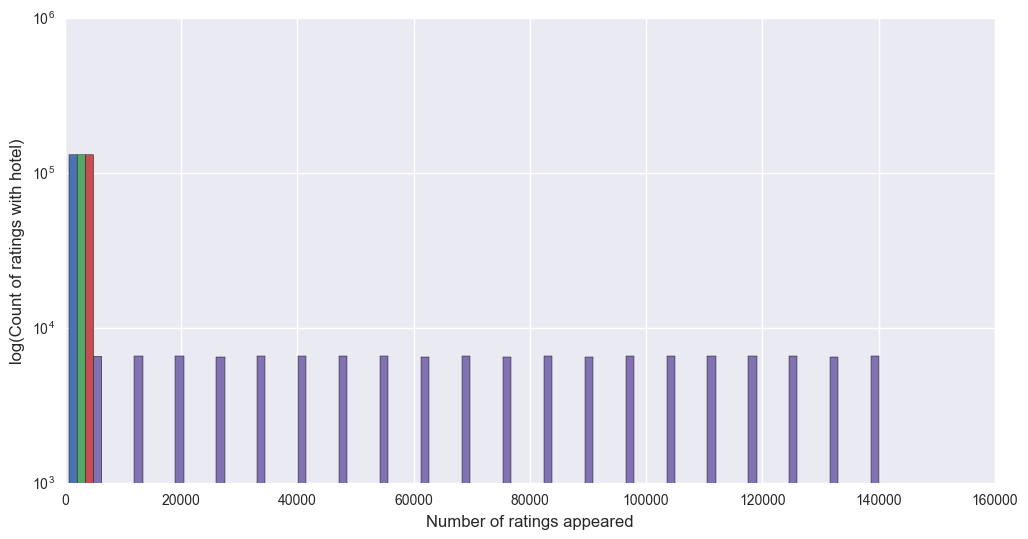

In [12]:
#expedia_OSAT_scores_count
for i in [2, 10, 15,25 ,50]:
    print('Counts that appear less than {} times: {}%'.format(i, round((expedia_OSAT_result < i).mean() * 100, 2)))
plt.figure(figsize=(12, 6))
plt.hist(expedia_OSAT_scores_count.values, bins=20, log=True)
plt.xlabel('Number of ratings appeared', fontsize=12)
plt.ylabel('log(Count of ratings with hotel)', fontsize=12)
plt.show()

# The flaw with using such type of scores is that scores with very small number of views can get inflated probability for better score.

For example, let's say there was an survey score with all scores as 4 (Cleanliness, comfort and condition = 4) for 2 surveys in hote A, there was another hotel b with 1000 surveys and 800 scoores of 4 (Cleanliness, comfort and condition = 4).

Both will come to same ranking and hence the there will be injustice done to the hotel B with more number of surveys.

However, I would argue that the second hotel should be preferred, because it has a track record of being surveyed very often, while the one with two surveys does not have enough data to say that the true choice of it being surveyed as 4.

Because of this, I add a term that penalizes hotel surveys with smaller surveys, therefore making it easy to recommend hotel with large amounts of survey data and a reliable probability. 

I do this by adding a fixed amount to the total of each survey (regularization factor = 15), which will reduce the probabilities of all survey counts, but will reduce the probabilities of smaller survey data with less number.

If we apply this to my earlier scenario, for the first ad we get hotel A probability of 2/(2+15) = 0.12, while the second hotel B gets adjusted probability of 800/(1000+15) = 0.78, therefore ranking the second hotel will be ahead.

In [13]:
reg = 15

# We combine the three CSV sheets - Sentimental score sheet, Word phrase sheet and the original CSV sheet to make a combined sheet for recommending a hotel to user based on all three factors.


**Steps:** 
- Loading all the three csv sheets and combine on hotelids
- Using many functions for getting user inputs based on his selection of city, country and recommending a centralised data for selection of the hotels. Such type of recommendations is called as collaborative filtering

In [13]:
hotelid_API_senti_scores = pd.read_csv(currentWD+"\\"+"CSV_Output"+"\\"+"hotelid_with_Microsoft_API_senti_scores.csv")

In [14]:
hotelid_API_senti_scores = hotelid_API_senti_scores[['hotelID','sentiscore']]
hotelid_API_senti_scores.head(5)

,hotelID,sentiscore
0,893,0.88
1,893,0.92
2,893,1.00
3,893,0.99
4,893,0.03


In [15]:
hotelid_API_senti_scores_sum_hotels = hotelid_API_senti_scores.groupby('hotelID').sum()
hotelid_API_senti_scores_count_hotels = hotelid_API_senti_scores.groupby('hotelID').count()
hotelid_API_senti_scores_average_sentiscore_hotels = hotelid_API_senti_scores_sum_hotels/hotelid_API_senti_scores_count_hotels
hotelid_API_senti_scores_average_sentiscore_hotels['hotelID'] = hotelid_API_senti_scores_average_sentiscore_hotels.index
hotelid_API_senti_scores_average_sentiscore_hotels = hotelid_API_senti_scores_average_sentiscore_hotels[['sentiscore','hotelID']]
hotelid_API_senti_scores_average_sentiscore_hotels.head(3)

,sentiscore,hotelID
hotelID,,
1,0.484500,1
5,0.473684,5
8,0.515500,8


In [16]:
hotelid_API_keyPhrases = pd.read_csv(currentWD+"\\"+"CSV_Output"+"\\"+"hotelid_with_microsoft_API_keyPhrases.csv")

In [17]:
hotelid_API_keyPhrases.head(5)

,hotelID,keywords1,keywords2,keywords3
0,893,nice perk,dam kids,NaN
1,11622,Clean rooms,Pool,weekend
2,11826,floor guests,good food hot,beer
3,39993,floor guests,negative feelings,NaN
4,64344,noise,YO bottle of Jameson,clerk service


In [18]:
microsoft_api_data_total = hotelid_API_keyPhrases.merge(hotelid_API_senti_scores_average_sentiscore_hotels,how='outer')

In [19]:
microsoft_api_data_total.head(3)

,hotelID,keywords1,keywords2,keywords3,sentiscore
0,893,nice perk,dam kids,NaN,0.832632
1,11622,Clean rooms,Pool,weekend,0.623750
2,11826,floor guests,good food hot,beer,0.406875


In [20]:
microsoft_api_data_total.to_csv('microsoft_api_data_total_combined.csv')

In [21]:
# Now we use the main file and read the data and comvbine all our work to make centralised dataset for user based recommendation systems

In [28]:
test_data = pd.read_csv('test.csv')
expedia_comments = pd.read_csv('reviews_clean_flitered.txt',names=["hotelID","Expedia_User_Comments","Expedia_Cleanliness","Expedia_RoomComfort","Expedia_HotelCondition"],sep="^")
expedia_comments_sum = expedia_comments.groupby('hotelID').sum()
expedia_comments_sum['hotelID'] = expedia_comments_sum.index

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
expedia_comments_sum_merge_microsoft_api = expedia_comments_sum.merge(microsoft_api_data_total,how='outer')

In [30]:
expedia_comments_sum_merge_microsoft_api.replace('  ', np.nan, inplace=True)
expedia_comments_sum_merge_microsoft_api = expedia_comments_sum_merge_microsoft_api.dropna()

In [31]:
expedia_comments_sum_merge_microsoft_api.head(3)

,Expedia_User_Comments,hotelID,keywords1,keywords2,keywords3,sentiscore
8,Our stay was fine the only problem was gettin...,9,floor guests,good food hot,beer,0.408947
14,"I am very picky, so I sure will stay again an...",15,issue,mixed drink,negative feelings,0.070000
36,Ideal hotel for families. Facilities okay. ...,39,Pizza,wife,dam kids,0.498333


In [32]:
test_data['date_time'] = pd.to_datetime(test_data['date_time']) # Converting into Date Time

In [33]:
select_data = test_data[['user_id','posa_continent','user_location_country','user_location_region','user_location_city','hotel_continent','hotel_country','srch_destination_id','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','is_booking','ratings','pricepaid']]
select_data.head()

,user_id,posa_continent,user_location_country,user_location_region,user_location_city,hotel_continent,hotel_country,srch_destination_id,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,ratings,pricepaid
0,1,3,66,174,37449,6,204,12243,2,0,1,1,5,1705
1,1,3,66,174,37449,6,204,14474,2,0,1,1,7,1743
2,20,3,66,142,17440,2,50,11353,4,0,1,1,7,3699
3,28,3,66,258,34156,2,50,8250,2,0,1,1,9,3758
4,50,3,66,467,36345,2,50,11812,2,0,1,0,4,1655


In [44]:
# selecting only thos who have booked for user recommendation

In [34]:
select_data_booked = select_data.loc[select_data['is_booking']==1]

In [35]:
select_data_booked.head(3)

,user_id,posa_continent,user_location_country,user_location_region,user_location_city,hotel_continent,hotel_country,srch_destination_id,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,ratings,pricepaid
0,1,3,66,174,37449,6,204,12243,2,0,1,1,5,1705
1,1,3,66,174,37449,6,204,14474,2,0,1,1,7,1743
2,20,3,66,142,17440,2,50,11353,4,0,1,1,7,3699


In [36]:
select_data_booked_count = select_data_booked.groupby(['user_location_city','hotel_continent','hotel_country','srch_destination_id']).size().reset_index(name='Number_Booking')

In [50]:
select_data_booked_count = pd.DataFrame(select_data_booked_count)
select_data_booked_count.head(4)

,user_location_city,hotel_continent,hotel_country,srch_destination_id,Number_Booking
0,0,0,34,6061,1
1,0,0,34,22298,1
2,0,2,50,669,1
3,0,2,50,7635,1


In [51]:
select_data_booked_sorted_count = select_data_booked_count.sort(['user_location_city','hotel_continent','hotel_country','Number_Booking'],ascending=[True,True,True,False])

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [52]:
select_data_booked_sorted_count.head(3)

,user_location_city,hotel_continent,hotel_country,srch_destination_id,Number_Booking
0,0,0,34,6061,1
1,0,0,34,22298,1
5,0,2,50,8250,2


In [97]:
try:
    user_city = int(input('Enter your city number:'))
except ValueError:
    print ("Not a Number - Please try again")

Enter your city number:5940


In [98]:
def continent():
    try:
        hotel_continent=int(input('Enter which continent you plan to visit from above values:'))
        if hotel_continent not in unique_continents:
            print("Please match the values provided to you")
            continent()
        else:
            x = hotel_continent
    except ValueError:
        print ("Not a Number - Please try again")  
        continent()
    return x

In [99]:
def country():
    try:
        hotel_country = int(input('Enter which country you want to visit from above values:'))
        if hotel_country not in unique_country:
            print("Please match the values provided to you")
            country()
        else:
            y = hotel_country
    except ValueError:
        print ("Not a Number - Please try again") 
        country()
    return y

In [100]:
user_selected_df = select_data_booked_sorted_count.loc[select_data_booked_sorted_count['user_location_city']== user_city ]

In [101]:
unique_continents = user_selected_df.hotel_continent.unique()
unique_country = user_selected_df.hotel_country.unique()
print("You can enter the following values for continent",unique_continents)
print("You can enter the following values for country",unique_country)

You can enter the following values for continent [2 4 6]
You can enter the following values for country [ 50  51   7  15  21  22  46  70  77 144]


In [102]:
hotel_continent = continent()
hotel_country = country()

Enter which continent you plan to visit from above values:2
Enter which country you want to visit from above values:50


In [74]:
hotel_country

99

In [75]:
hotel_continent

3

In [103]:
user_selected_country_city = user_selected_df.loc[(user_selected_df['hotel_continent']==hotel_continent) & (user_selected_df['hotel_country']==hotel_country)]

In [104]:
user_selected_country_city = user_selected_country_city.rename(index = str,columns ={"srch_destination_id":"hotelID"})
user_selected_country_city.head(3)

,user_location_city,hotel_continent,hotel_country,hotelID,Number_Booking
47056,5940,2,50,11569,2
47052,5940,2,50,8216,1
47053,5940,2,50,8250,1


In [105]:
user_selected_df_with_comments_osat = user_selected_country_city.merge(expedia_OSAT_result, how ='left')
user_selected_df_with_comments_osat = user_selected_df_with_comments_osat.fillna(0)
user_selected_df_with_comments_osat = user_selected_df_with_comments_osat.merge(expedia_comments_sum_merge_microsoft_api,how='left').fillna(0)

In [106]:
user_selected_df_with_comments_osat

,user_location_city,hotel_continent,hotel_country,hotelID,Number_Booking,Number Of Surveys,Cleanliness_Score,Comfort_Score,Condition_Score,Expedia_User_Comments,keywords1,keywords2,keywords3,sentiscore
0,5940,2,50,11569,2,19,3.526316,3.473684,3.263158,0,0,0,0,0.000
1,5940,2,50,8216,1,57,3.421053,3.000000,3.000000,0,0,0,0,0.000
2,5940,2,50,8250,1,61,3.442623,3.344262,3.000000,0,0,0,0,0.000
3,5940,2,50,8291,1,2,0.000000,0.000000,0.000000,0,0,0,0,0.000
4,5940,2,50,8830,1,1,0.000000,0.000000,0.000000,0,0,0,0,0.000
5,5940,2,50,12390,1,3,0.000000,0.000000,0.000000,0,0,0,0,0.000
6,5940,2,50,14845,1,20,4.750000,4.100000,4.250000,0,0,0,0,0.000
7,5940,2,50,25502,1,20,4.200000,4.000000,3.850000,"We chose this hotel, primarily because I got ...",wife,way,elevator,0.525
8,5940,2,50,25803,1,1,0.000000,0.000000,0.000000,0,0,0,0,0.000
9,5940,2,50,28584,1,6,3.666667,3.333333,3.500000,0,0,0,0,0.000


In [107]:
user_selected_df_with_comments_osat.to_csv("user_based_recommended_hotel.csv")